## Lesson 5: 
### Exercise 1: Position of a quasar
#### Homoscedastic case:

1. We draw a sample of N gaussianly distributed numbers (Those will be our data). In this case we know that the parameters of the original distribution are $$\mu = 1$$ $$\sigma = 0.2$$ Usually we know $\sigma$ a priori (e.g. is a property of the telescope) but we usually want to infer $\mu$. 
2. We see every number as an independent measurement of the position of a quasar, each one with its own probability (gaussian).
3. We build the **Likelihood function** by taking the product of those probability.
4. We look for the MLE estimator of the position of the QUASAR by taking the maximum of the Likelihood function (or equivalently the maximum of the log of the likelihood)
5. We compare with the known MLE estimator for gaussianly homoscedastic distributed data, which is the **sample mean**.

Results for the homoscedastic case: 

The maximum likelihood solution is:  0.89
The maximum log-likelihood solution is:  0.89
The MLE estimator (sample mean) is:  0.8877668685953479
The relative error (with the real mu=1 of the distribution) is:  0.10999999999999999


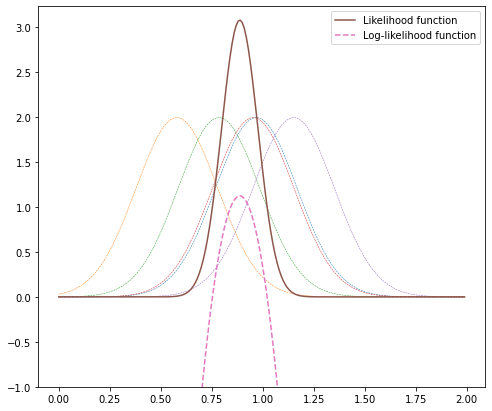

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as scipy
from scipy import stats, interpolate
from astroML.datasets import fetch_dr7_quasar
from tqdm import tqdm

mu = 1
sigma = 0.2
N = 5

x_i = np.random.normal(mu, sigma, N)
#We want to define the likelihood function
#First we compute the individual likelihoods (p(x| mu, sigma))

x_arr = np.arange(0, 2, 0.01)
lik = [stats.norm(loc=x, scale=sigma) for x in x_i]
fig, ax = plt.subplots(figsize=(8,7))
for i in lik:
    ax.plot(x_arr, i.pdf(x_arr), lw = 0.5, ls = '--')
    
y_arr = [a.pdf(x_arr) for a in lik]
prod = np.prod(np.vstack(y_arr), axis=0) #np.vstack takes the list of arrays and stacks them vertically.
ax.plot(x_arr, prod, label = 'Likelihood function')
ax.set_ylim(-1)

y_arr_log = [a.logpdf(x_arr) for a in lik]
sum_log = np.sum(np.vstack(y_arr_log), axis=0) #np.vstack takes the list of arrays and stacks them vertically.
ax.plot(x_arr, sum_log, label = 'Log-likelihood function', ls = '--')
ax.legend(loc = 'upper right')

mu_lik = x_arr[np.argsort(sum_log)[-1]]

print('Results for the homoscedastic case: \n')
print('The maximum likelihood solution is: ', x_arr[np.argsort(prod)[-1]])
print('The maximum log-likelihood solution is: ', mu_lik)
print('The MLE estimator (sample mean) is: ', np.mean(x_i))
print('The relative error (with the real mu=1 of the distribution) is: ', np.abs(mu-x_arr[np.argsort(sum_log)[-1]])/mu)

6. Now we can check that the error we obtain by manually computing the **Fisher matrix** elements is equal to the error on the sample mean, namely: $$\sigma_\mu = \frac{\sigma}{\sqrt{N}}$$

The error on the mean, using the general Fisher matrix estimate is:  0.08944271909999157
The known error on the sample mean is:  0.08944271909999159


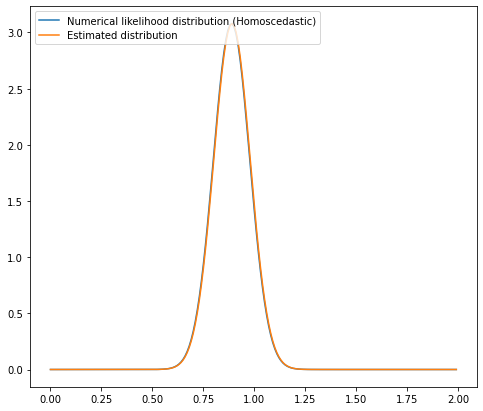

In [10]:
#We want to approximate the second derivative of the likelihood: we apply the np.diff() function twice and we devide by the step on the x axis, to the 2nd power
diff_2 = np.sqrt(-np.diff(np.diff(sum_log))/(0.01**2))
sig_lik = 1/np.mean(diff_2)

print('The error on the mean, using the general Fisher matrix estimate is: ', sig_lik)
print('The known error on the sample mean is: ', sigma/np.sqrt(N))

fig, ax = plt.subplots(figsize=(8,7))
ax.plot(x_arr, prod, label = 'Numerical likelihood distribution (Homoscedastic)')
dist_norm = stats.norm(loc = mu_lik, scale = sig_lik)
ax.plot(x_arr, dist_norm.pdf(x_arr)*(np.max(prod)/np.max(dist_norm.pdf(x_arr))), label = 'Estimated distribution') #We introduced manually a scaling factor
ax.legend(loc = 'upper left')

## Heteroscedastic case

Results for the heteroscedastic case: 

The maximum likelihood solution is:  0.92
The maximum log-likelihood solution is:  0.92
The MLE estimator (weighted mean) is:  0.9203260327516485
The relative error (with the real mu=1 of the distribution) is:  0.10999999999999999


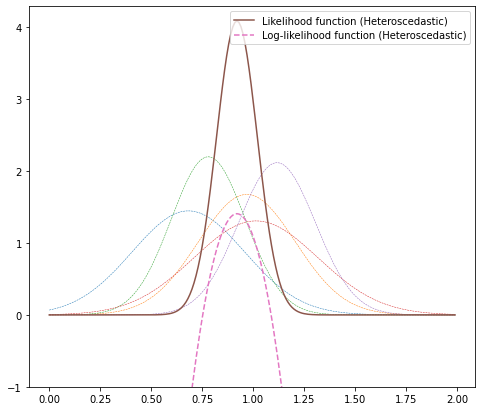

In [15]:
sigma_i = np.random.normal(0.2, 0.05, N)
x_i = np.random.normal(mu, sigma, N)

x_arr = np.arange(0, 2, 0.01)
lik_eter = [stats.norm(loc=x, scale=sig) for (x, sig) in zip(x_i, sigma_i)]
fig, ax = plt.subplots(figsize=(8,7))
for i in lik_eter:
    ax.plot(x_arr, i.pdf(x_arr), lw = 0.5, ls = '--')


y_eter = [a.pdf(x_arr) for a in lik_eter]
product = np.prod(np.vstack(y_eter), axis=0) #np.vstack takes the list of arrays and stacks them vertically.
ax.plot(x_arr, product, label = 'Likelihood function (Heteroscedastic)')
ax.set_ylim(-1)

y_eter_log = [a.logpdf(x_arr) for a in lik_eter]
sum_log_eter = np.sum(np.vstack(y_eter_log), axis=0) #np.vstack takes the list of arrays and stacks them vertically.
ax.plot(x_arr, sum_log_eter, label = 'Log-likelihood function (Heteroscedastic)', ls = '--')
ax.legend(loc = 'upper right')

mu_lik_eter = x_arr[np.argsort(sum_log_eter)[-1]]
mu_weighted = (np.sum(x_i/(sigma_i**2)))/(np.sum(1/(sigma_i**2)))

print('Results for the heteroscedastic case: \n')
print('The maximum likelihood solution is: ', x_arr[np.argsort(product)[-1]])
print('The maximum log-likelihood solution is: ', mu_lik_eter)
print('The MLE estimator (weighted mean) is: ', mu_weighted)
print('The relative error (with the real mu=1 of the distribution) is: ', np.abs(mu-x_arr[np.argsort(sum_log)[-1]])/mu)

The error on the estimated mean, using the general Fisher matrix estimate is:  0.0998989158110793
The known error on the weighted mean is:  0.0998989158110791


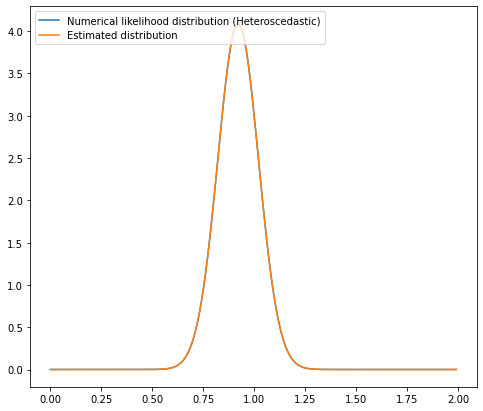

In [16]:
diff_2_eter = np.diff(np.diff(sum_log_eter))/(0.01**2)
sig_lik_eter = (-np.mean(diff_2_eter))**(-0.5)
mu_weighted = (np.sum(x_i/(sigma_i**2)))/(np.sum(1/(sigma_i**2)))

print('The error on the estimated mean, using the general Fisher matrix estimate is: ', sig_lik_eter)
print('The known error on the weighted mean is: ', (np.sum(1/(sigma_i**2)))**(-0.5))

fig, ax = plt.subplots(figsize=(8,7))
ax.plot(x_arr, product, label = 'Numerical likelihood distribution (Heteroscedastic)')

dist_norm_eter = stats.norm(loc = mu_lik_eter, scale = sig_lik_eter)
ax.plot(x_arr, dist_norm_eter.pdf(x_arr)*(np.max(product)/np.max(dist_norm_eter.pdf(x_arr))), label = 'Estimated distribution') #We introduced manually a scaling factor
ax.legend(loc = 'upper left')

## Correction 

For each measurement i know i've measured $x_i$ with a $\sigma = 0.2$, nothing else. 

For the weighted averange you can use np.average with $\frac{1}{\sigma^2}$ as weights